In [1]:
# Tomita 6
import torch
import torch.nn as nn
import math 
import os
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#print("Current Working Directory:", os.getcwd())
os.chdir( '/home/jupyter-nadia/bachelor-arbeit')

In [3]:
import Experiments.Model as Model
from Experiments.Pre_process_data import stats, stats_avg

In [5]:
# get stats of language
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats('data/MyData/Tomita6')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


max_len: 100 
train_src: 5000 
train_tgt: 5000 
bin0_src: 1000 
bin0_tgt: 1000 
bin1_src: 1000 
bin1_tgt: 1000


In [4]:
#get stats of language
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats_avg('data/MyData/Tomita3')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)

max_len: 100 
train_src: 33.0038 
train_tgt: 66.0076 
bin0_src: 30.363 
bin0_tgt: 60.726 
bin1_src: 75.212 
bin1_tgt: 150.424


In [6]:
# 1. Recurrent (# 4 layers in the main code )
# lesser layers give us slightly worse accuracy

In [5]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = False
no_posi_encoding = False
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 2000000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, layer_number_main=8)

In [6]:
epochs =200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.517509, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.405060, dev Accuracy: 3.90%
Epoch [3/200], Loss: 0.347289, dev Accuracy: 15.80%
Epoch [4/200], Loss: 0.317940, dev Accuracy: 18.40%
Epoch [5/200], Loss: 0.303891, dev Accuracy: 23.50%
Epoch [6/200], Loss: 0.310365, dev Accuracy: 17.70%
Epoch [7/200], Loss: 0.284472, dev Accuracy: 24.50%
Epoch [8/200], Loss: 0.264157, dev Accuracy: 29.70%
Epoch [9/200], Loss: 0.255655, dev Accuracy: 29.60%
Epoch [10/200], Loss: 0.276669, dev Accuracy: 29.80%
Epoch [11/200], Loss: 0.253293, dev Accuracy: 32.00%
Epoch [12/200], Loss: 0.238606, dev Accuracy: 32.60%
Epoch [13/200], Loss: 0.262988, dev Accuracy: 33.60%
Epoch [14/200], Loss: 0.230606, dev Accuracy: 35.40%
Epoch [15/200], Loss: 0.271080, dev Accuracy: 10.90%
Epoch [16/200], Loss: 0.215211, dev Accuracy: 37.20%
Epoch [17/200], Loss: 0.219880, dev Accuracy: 33.70%
Epoch [18/200], Loss: 0.219792, dev Accuracy: 37.20%
Epoch [19/200], Loss: 0.211293, dev Accuracy: 36.10%
Epoc

In [7]:
 tomita_6.test(0)

accuracy of all bin 0 is:  87.6 %


In [8]:
 tomita_6.test(1)

accuracy of all bin 1 is:  26.8 %


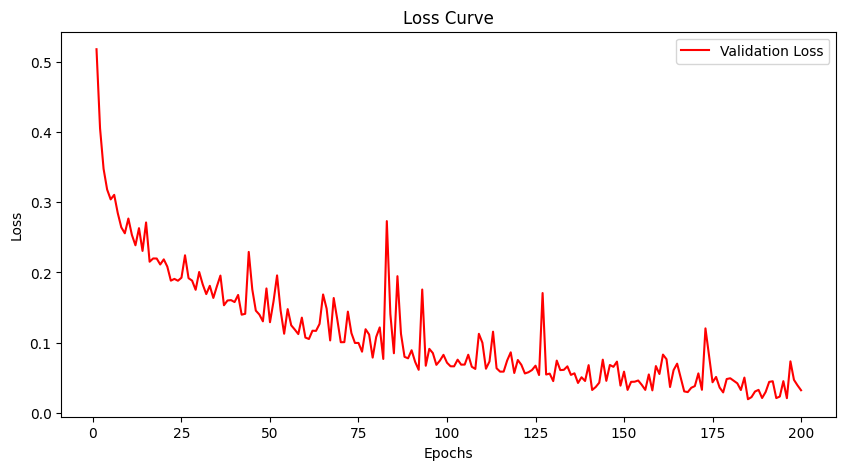

In [9]:
 tomita_6.visualize(epochs)

In [22]:
#2. Universal (# Layers = 8, 63% and 17.6 % 
#  No positional encoding

In [10]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = True
no_posi_encoding = True
rope = False
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, num_layers = 6, rope = rope)

In [11]:
epochs = 200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.441087, dev Accuracy: 1.80%
Epoch [2/200], Loss: 0.363491, dev Accuracy: 10.00%
Epoch [3/200], Loss: 0.339511, dev Accuracy: 13.30%
Epoch [4/200], Loss: 0.317432, dev Accuracy: 15.20%
Epoch [5/200], Loss: 0.312793, dev Accuracy: 15.10%
Epoch [6/200], Loss: 0.300007, dev Accuracy: 20.00%
Epoch [7/200], Loss: 0.287047, dev Accuracy: 21.40%
Epoch [8/200], Loss: 0.281415, dev Accuracy: 19.20%
Epoch [9/200], Loss: 0.293915, dev Accuracy: 19.80%
Epoch [10/200], Loss: 0.274347, dev Accuracy: 22.60%
Epoch [11/200], Loss: 0.257838, dev Accuracy: 23.80%
Epoch [12/200], Loss: 0.259112, dev Accuracy: 22.60%
Epoch [13/200], Loss: 0.269033, dev Accuracy: 25.10%
Epoch [14/200], Loss: 0.252443, dev Accuracy: 26.90%
Epoch [15/200], Loss: 0.256361, dev Accuracy: 26.70%
Epoch [16/200], Loss: 0.237201, dev Accuracy: 28.20%
Epoch [17/200], Loss: 0.237809, dev Accuracy: 25.20%
Epoch [18/200], Loss: 0.246392, dev Accuracy: 29.70%
Epoch [19/200], Loss: 0.226078, dev Accuracy: 28.20%
Epo

In [12]:
 tomita_6.test(0)

accuracy of all bin 0 is:  83.1 %


In [13]:
 tomita_6.test(1)

accuracy of all bin 1 is:  8.5 %


In [14]:
 tomita_6.visualize(epochs)

In [ ]:
#3. no posi encoding

In [18]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = False
no_posi_encoding = True
rope= False
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 2000000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, layer_number_main=8, rope= rope)

In [19]:
epochs = 200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.528261, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.508074, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.459445, dev Accuracy: 0.40%
Epoch [4/200], Loss: 0.399034, dev Accuracy: 6.50%
Epoch [5/200], Loss: 0.383942, dev Accuracy: 7.70%
Epoch [6/200], Loss: 0.360936, dev Accuracy: 9.90%
Epoch [7/200], Loss: 0.341817, dev Accuracy: 12.90%
Epoch [8/200], Loss: 0.326697, dev Accuracy: 12.80%
Epoch [9/200], Loss: 0.322058, dev Accuracy: 15.60%
Epoch [10/200], Loss: 0.318072, dev Accuracy: 14.50%
Epoch [11/200], Loss: 0.318392, dev Accuracy: 17.00%
Epoch [12/200], Loss: 0.294780, dev Accuracy: 18.50%
Epoch [13/200], Loss: 0.283799, dev Accuracy: 21.50%
Epoch [14/200], Loss: 0.288494, dev Accuracy: 19.50%
Epoch [15/200], Loss: 0.282181, dev Accuracy: 20.40%
Epoch [16/200], Loss: 0.290861, dev Accuracy: 19.70%
Epoch [17/200], Loss: 0.273882, dev Accuracy: 23.80%
Epoch [18/200], Loss: 0.259367, dev Accuracy: 24.90%
Epoch [19/200], Loss: 0.255130, dev Accuracy: 25.50%
Epoch [2

In [20]:
tomita_6.test(0)

accuracy of all bin 0 is:  65.4 %


In [21]:
tomita_6.test(1)

accuracy of all bin 1 is:  16.3 %


In [22]:
 tomita_6.visualize(epochs)

In [23]:
#4. standard Posi encoding

In [24]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = False
no_posi_encoding = True
rope= False
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 2000000, dropout = 0.1, alibi = alibi, no_posi_encoding= no_posi_encoding, layer_number_main=8, rope= rope)

In [25]:
epochs = 200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.533987, dev Accuracy: 0.10%
Epoch [2/200], Loss: 0.519903, dev Accuracy: 0.10%
Epoch [3/200], Loss: 0.508090, dev Accuracy: 0.20%
Epoch [4/200], Loss: 0.498860, dev Accuracy: 0.30%
Epoch [5/200], Loss: 0.483687, dev Accuracy: 0.40%
Epoch [6/200], Loss: 0.476163, dev Accuracy: 0.60%
Epoch [7/200], Loss: 0.464972, dev Accuracy: 0.80%
Epoch [8/200], Loss: 0.451176, dev Accuracy: 1.10%
Epoch [9/200], Loss: 0.441596, dev Accuracy: 1.50%
Epoch [10/200], Loss: 0.435963, dev Accuracy: 1.80%
Epoch [11/200], Loss: 0.425610, dev Accuracy: 2.40%
Epoch [12/200], Loss: 0.423706, dev Accuracy: 2.60%
Epoch [13/200], Loss: 0.382682, dev Accuracy: 5.30%
Epoch [14/200], Loss: 0.369201, dev Accuracy: 7.10%
Epoch [15/200], Loss: 0.367028, dev Accuracy: 8.00%
Epoch [16/200], Loss: 0.366346, dev Accuracy: 7.30%
Epoch [17/200], Loss: 0.351913, dev Accuracy: 8.70%
Epoch [18/200], Loss: 0.343555, dev Accuracy: 9.50%
Epoch [19/200], Loss: 0.327845, dev Accuracy: 12.10%
Epoch [20/200], Loss

In [26]:
tomita_6.test(0)

accuracy of all bin 0 is:  79.6 %


In [27]:
tomita_6.test(1)

accuracy of all bin 1 is:  0.8 %


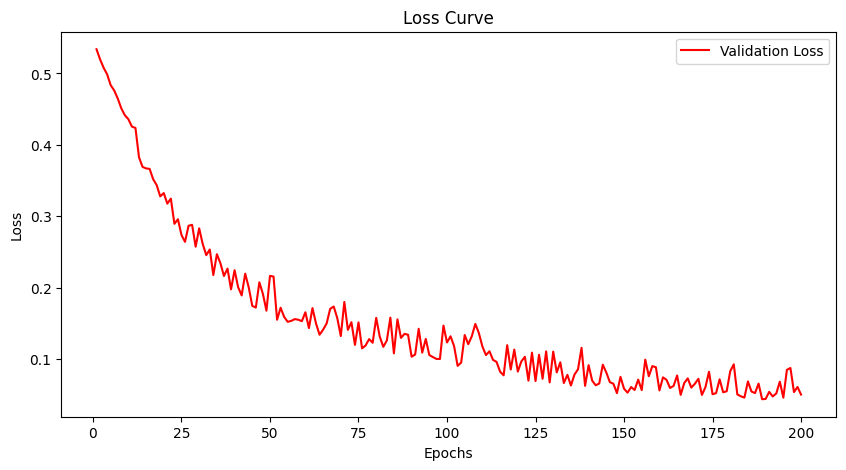

In [28]:
 tomita_6.visualize(epochs)

In [ ]:
#5. cos 

In [8]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = False
no_posi_encoding = False
rope= False
tomita_6 = Model.run_model(url, learning_rate = 0.01, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 2000000, dropout = 0.0, alibi = alibi, pos_enc= 'cos', no_posi_encoding= no_posi_encoding, layer_number_main=8, rope= rope)

In [ ]:
epochs = 200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.559312, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.562265, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.561518, dev Accuracy: 0.00%
Epoch [4/200], Loss: 0.559068, dev Accuracy: 0.00%
Epoch [5/200], Loss: 0.562171, dev Accuracy: 0.00%
Epoch [6/200], Loss: 0.561059, dev Accuracy: 0.00%
Epoch [7/200], Loss: 0.562174, dev Accuracy: 0.00%
Epoch [8/200], Loss: 0.561581, dev Accuracy: 0.00%
Epoch [9/200], Loss: 0.562391, dev Accuracy: 0.00%
Epoch [10/200], Loss: 0.561448, dev Accuracy: 0.00%
Epoch [11/200], Loss: 0.559338, dev Accuracy: 0.00%
Epoch [12/200], Loss: 0.560753, dev Accuracy: 0.00%
Epoch [13/200], Loss: 0.560856, dev Accuracy: 0.00%
Epoch [14/200], Loss: 0.562890, dev Accuracy: 0.00%
Epoch [15/200], Loss: 0.561098, dev Accuracy: 0.00%
Epoch [16/200], Loss: 0.560725, dev Accuracy: 0.00%
Epoch [17/200], Loss: 0.561494, dev Accuracy: 0.00%
Epoch [18/200], Loss: 0.562630, dev Accuracy: 0.00%
Epoch [19/200], Loss: 0.562080, dev Accuracy: 0.00%
Epoch [20/200], Loss:

In [ ]:
tomita_6.test(0)

In [ ]:
tomita_6.test(1)

In [ ]:
tomita_6.visualize(epochs)

In [ ]:
#learnable

In [ ]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = False
no_posi_encoding = False
rope= False
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 2000000, dropout = 0.0, alibi = alibi, pos_enc= 'learnable', no_posi_encoding= no_posi_encoding, layer_number_main=8, rope= rope)

In [ ]:
epochs = 200
tomita_6.train_eval(epochs)

In [ ]:
tomita_6.test(0)

In [ ]:
tomita_6.test(1)

In [ ]:
tomita_6.visualize(epochs)

In [4]:
#rope

In [11]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = False
no_posi_encoding = False
rope= True
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 2000000, dropout = 0.1, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, layer_number_main=8, rope= rope)

In [12]:
epochs = 200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.519301, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.516060, dev Accuracy: 0.00%
Epoch [3/200], Loss: 0.491219, dev Accuracy: 0.50%
Epoch [4/200], Loss: 0.464121, dev Accuracy: 1.30%
Epoch [5/200], Loss: 0.442819, dev Accuracy: 1.40%
Epoch [6/200], Loss: 0.430314, dev Accuracy: 1.60%
Epoch [7/200], Loss: 0.430494, dev Accuracy: 2.00%
Epoch [8/200], Loss: 0.413150, dev Accuracy: 3.50%
Epoch [9/200], Loss: 0.407533, dev Accuracy: 5.20%
Epoch [10/200], Loss: 0.405342, dev Accuracy: 5.70%
Epoch [11/200], Loss: 0.397051, dev Accuracy: 5.20%
Epoch [12/200], Loss: 0.386890, dev Accuracy: 6.50%
Epoch [13/200], Loss: 0.390422, dev Accuracy: 7.30%
Epoch [14/200], Loss: 0.378954, dev Accuracy: 6.80%
Epoch [15/200], Loss: 0.372878, dev Accuracy: 8.20%
Epoch [16/200], Loss: 0.368521, dev Accuracy: 10.10%
Epoch [17/200], Loss: 0.370694, dev Accuracy: 7.80%
Epoch [18/200], Loss: 0.365825, dev Accuracy: 9.00%
Epoch [19/200], Loss: 0.350876, dev Accuracy: 11.30%
Epoch [20/200], Los

In [13]:
 tomita_6.test(0)

accuracy of all bin 0 is:  46.6 %


In [14]:
 tomita_6.test(1)

accuracy of all bin 1 is:  8.9 %


In [15]:
 tomita_6.visualize(epochs)

In [ ]:
# rope with masking

In [19]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = False
universal = False
no_posi_encoding = False
rope= True
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 2000000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, layer_number_main=8, rope= rope)

In [20]:
epochs = 200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.530943, dev Accuracy: 0.00%
Epoch [2/200], Loss: 0.519516, dev Accuracy: 0.10%
Epoch [3/200], Loss: 0.511044, dev Accuracy: 0.10%
Epoch [4/200], Loss: 0.499620, dev Accuracy: 0.20%
Epoch [5/200], Loss: 0.479290, dev Accuracy: 0.40%
Epoch [6/200], Loss: 0.467897, dev Accuracy: 1.20%
Epoch [7/200], Loss: 0.459225, dev Accuracy: 2.00%
Epoch [8/200], Loss: 0.448453, dev Accuracy: 2.20%
Epoch [9/200], Loss: 0.440215, dev Accuracy: 3.00%
Epoch [10/200], Loss: 0.430671, dev Accuracy: 4.20%
Epoch [11/200], Loss: 0.421030, dev Accuracy: 4.70%
Epoch [12/200], Loss: 0.412586, dev Accuracy: 5.40%
Epoch [13/200], Loss: 0.417580, dev Accuracy: 5.90%
Epoch [14/200], Loss: 0.400277, dev Accuracy: 6.00%
Epoch [15/200], Loss: 0.391432, dev Accuracy: 7.60%
Epoch [16/200], Loss: 0.382188, dev Accuracy: 8.90%
Epoch [17/200], Loss: 0.378034, dev Accuracy: 10.00%
Epoch [18/200], Loss: 0.372208, dev Accuracy: 10.50%
Epoch [19/200], Loss: 0.365721, dev Accuracy: 11.00%
Epoch [20/200], Lo

In [21]:
 tomita_6.test(0)

accuracy of all bin 0 is:  54.9 %


In [22]:
 tomita_6.test(1)


accuracy of all bin 1 is:  8.1 %


In [23]:
 tomita_6.visualize(epochs)

In [ ]:
# Alibi

In [4]:
# Tomita 6:
url = 'data/MyData/Tomita6'
alibi = True
universal = False
no_posi_encoding = False
rope= False
tomita_6 = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 64, scheduler_lr= 2000000, dropout = 0.0, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, layer_number_main=8, rope= rope)

In [5]:
epochs = 200
tomita_6.train_eval(epochs)

Epoch [1/200], Loss: 0.491902, dev Accuracy: 0.70%
Epoch [2/200], Loss: 0.394259, dev Accuracy: 6.60%
Epoch [3/200], Loss: 0.352681, dev Accuracy: 11.40%
Epoch [4/200], Loss: 0.321971, dev Accuracy: 17.80%
Epoch [5/200], Loss: 0.306251, dev Accuracy: 19.40%
Epoch [6/200], Loss: 0.295708, dev Accuracy: 24.50%
Epoch [7/200], Loss: 0.271553, dev Accuracy: 26.30%
Epoch [8/200], Loss: 0.272773, dev Accuracy: 24.60%
Epoch [9/200], Loss: 0.261691, dev Accuracy: 25.10%
Epoch [10/200], Loss: 0.243123, dev Accuracy: 28.70%
Epoch [11/200], Loss: 0.247497, dev Accuracy: 28.50%
Epoch [12/200], Loss: 0.239325, dev Accuracy: 29.80%
Epoch [13/200], Loss: 0.230782, dev Accuracy: 33.00%
Epoch [14/200], Loss: 0.242492, dev Accuracy: 31.50%
Epoch [15/200], Loss: 0.219859, dev Accuracy: 33.90%
Epoch [16/200], Loss: 0.225428, dev Accuracy: 33.00%
Epoch [17/200], Loss: 0.211644, dev Accuracy: 34.50%
Epoch [18/200], Loss: 0.205350, dev Accuracy: 37.30%
Epoch [19/200], Loss: 0.216074, dev Accuracy: 33.10%
Epoc

In [6]:
 tomita_6.test(0)

accuracy of all bin 0 is:  89.5 %


In [7]:
 tomita_6.test(1)

accuracy of all bin 1 is:  20.9 %


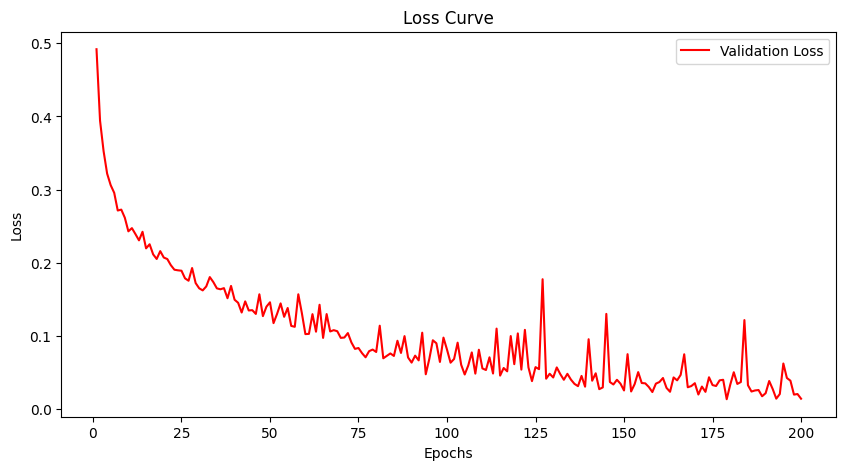

In [8]:
 tomita_6.visualize(epochs)